In [2]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')

def relativelyprime(num1, num2):
    mn = min(num1, num2) 
    for i in range(1, mn+1): 
         if num1%i==0 and num2%i==0: 
             hcf = i 
    if hcf == 1: 
         return True
    else: 
         return False

def ecross(j, k):
    return 2*k/(3*j)

In [7]:
#%matplotlib notebook
        
class Clicker(object):
    def __init__(self,j,k,m, kmax=1):
        fig, self.ax = plt.subplots(figsize=(12,8))
        self.j = j
        self.k = k
        self.m = m
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)
        
        if k > 5:
            raise("Only supports resonances of order k=5 or less")
        h = [0, 0.535, 0.426, 0.420, 0.454, 0.519, 0.613, 0.742, 0.914, 1.143, 1.445] # coefficients for k order resonances
        self.ax.set_xlim([0,1])
        self.ax.set_ylim([1, 2])
        self.ax.set_xlabel('Normalized Eccentricity',fontsize=30)
        self.ax.set_ylabel('Period Ratio',fontsize=30)
        

        jmax=200

        for k in range(1,kmax+1):
            for j in range(1+k, jmax):
                if not relativelyprime(j, k):
                    continue
                P21 = j/(j-k) # P2/P1
                if P21 > self.ax.get_ylim()[0] and P21 < self.ax.get_ylim()[1]:
                    es = np.linspace(0, 1, 100)
                    dPs = P21*2*np.sqrt(3)*h[k]**(1/2)*m**(1/2)*(es)**(k/2)
                    self.ax.plot(es, P21+dPs, 'k', alpha=0.5)
                    self.ax.plot(es, P21-dPs, 'k', alpha=0.5)
                    self.ax.fill_between(es, P21-dPs, P21+dPs, alpha=0.2, color='k')
            
        #deltas = (1-P12s**(2/3))/(2*mu/3)**(1/4)
        #ax.plot(1/P12s, np.exp(-2.2*deltas**(-4/3)), color='purple', lw=5, label='2-planet Criterion')
        
    def __call__(self, event):
        etilde = event.xdata
        P = event.ydata
        phi = np.pi # at the stable eq
        
        sim = self.make_sim(phi, P, self.m, etilde, self.j, self.k)
        Plist, collision = self.run(sim)
        if collision == True:
            self.ax.plot([etilde]*len(Plist), Plist, 'r.')
        else:
            self.ax.plot([etilde]*len(Plist), Plist, 'k.')
    
    def make_sim(self, phi, P, m, etilde, j, k):
        ecross = 1 - ((j-k)/j)**(2/3)
        e = etilde*ecross
        
        # start l1 at pi 
        # phi = j*l2 - (j-k)*l1 - k*pomega1
        # if pomega1 = 0, l1=pi, l2 = (phi+(j-k)*pi)/j
        sim = rebound.Simulation()
        sim.add(m=1)
        sim.add(m=m, P=1, l=(phi-j*np.pi)/k)
        sim.add(e=e, P=P, l=sim.particles[1].l + np.pi)
        sim.move_to_com()
        sim.particles[1].r = sim.particles[1].a*(sim.particles[1].m/3/sim.particles[0].m)**(1/3)
        sim.collision = "line"
        return sim

    def run(self, sim):
        Npts = 50
        ps = sim.particles
        Plist = []
        collision = False
        times = np.linspace(0, 1000*np.sqrt(2), Npts)
        for time in times:
            try:
                sim.integrate(time)
            except rebound.Collision:
                collision = True
                return Plist, collision
            Plist.append(ps[2].P/ps[1].P)
            
        return Plist, collision

(1.45, 1.55)

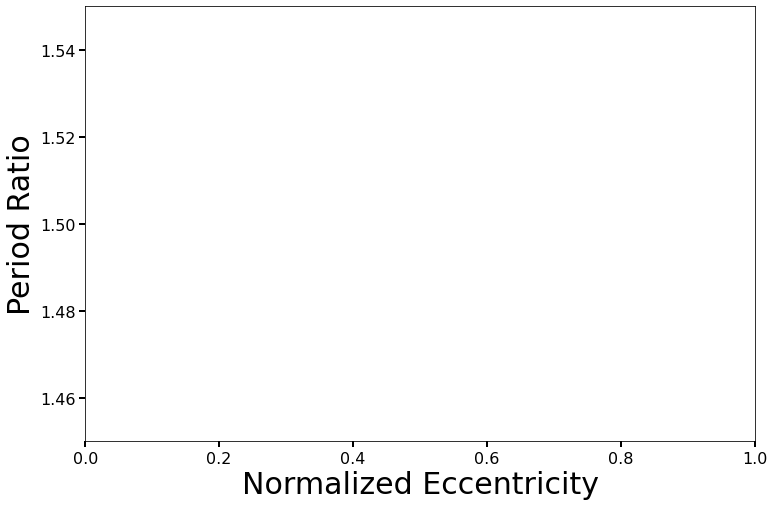

In [9]:
clicker=Clicker(j=2, k=1, m=3e-6, kmax=0) 
clicker.ax.set_ylim([1.45, 1.55])

<IPython.core.display.Javascript object>


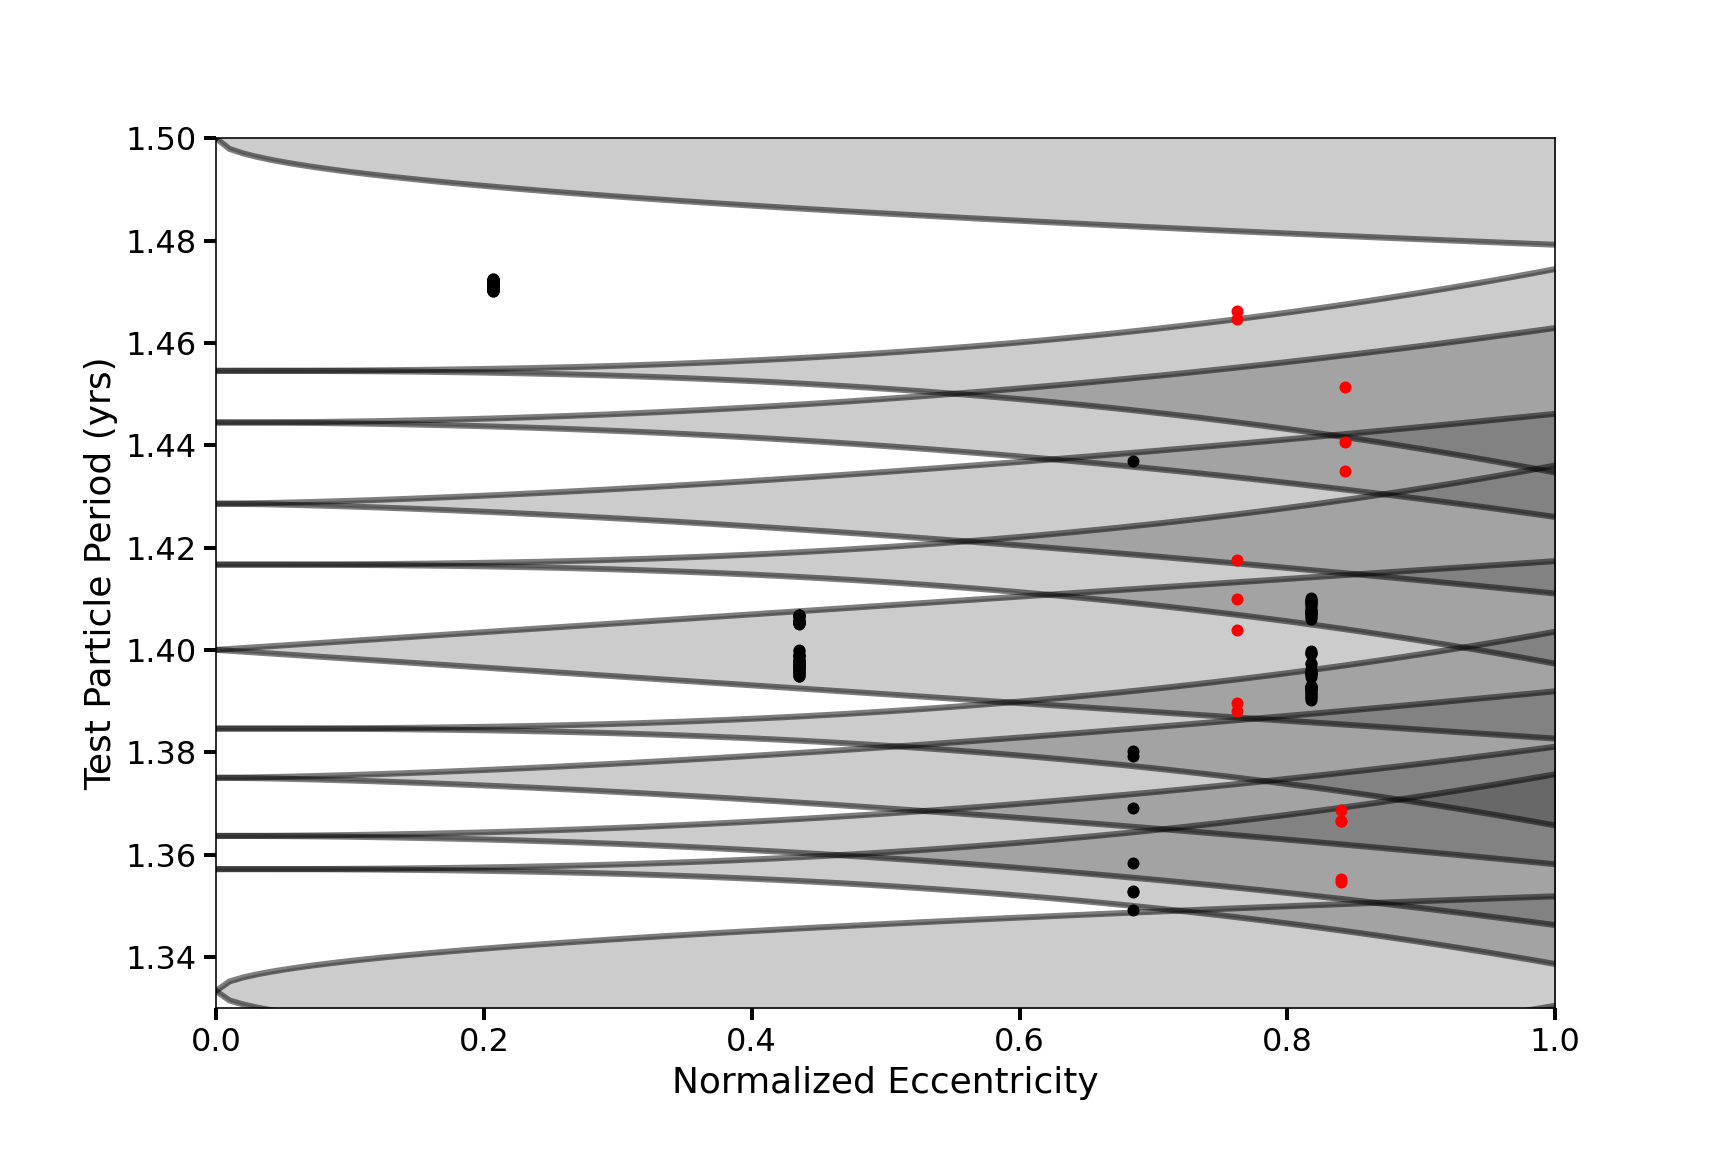

(1.33, 1.5)

In [7]:
%matplotlib notebook

clicker=Clicker(j=3, k=1, m=3e-5, kmax=5) 
clicker.ax.set_ylim([1.33, 1.5])

In [3]:
ecross(3,1)

0.2222222222222222

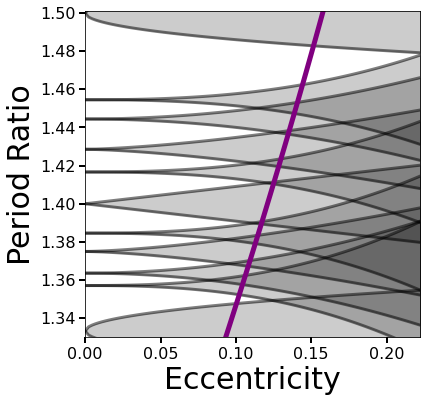

In [9]:
fig, ax = plt.subplots(figsize=(6,6))

m=3e-5
ax.set_ylim([1.33, 1.501])
ax.set_xlim([0,ecross(j=3,k=1)]) # ecross for the widest (3:2 MMR)
ax.set_xlabel('Eccentricity',fontsize=30)
ax.set_ylabel('Period Ratio',fontsize=30)
h = [0, 0.535, 0.426, 0.420, 0.454, 0.519, 0.613, 0.742, 0.914, 1.143, 1.445] # coefficients for k order resonances

jmax=20
kmax=5
for k in range(1,kmax+1):
    for j in range(1+k, jmax):
        if not relativelyprime(j, k):
            continue
        P21 = j/(j-k) # P2/P1
        if P21 > ax.get_ylim()[0] and P21 < ax.get_ylim()[1]:
            es = np.linspace(0, ax.get_xlim()[1], 100)
            ec = ecross(j,k)
            dPs = P21*2*np.sqrt(3)*h[k]**(1/2)*m**(1/2)*(es/ec)**(k/2)
            ax.plot(es, P21+dPs, 'k', alpha=0.5)
            ax.plot(es, P21-dPs, 'k', alpha=0.5)
            ax.fill_between(es, P21-dPs, P21+dPs, alpha=0.2, color='k')

P12s = np.linspace(1/ax.get_ylim()[1], 1/ax.get_ylim()[0], 100)
ecs = 1 - P12s**(2/3)
deltas = (1-P12s**(2/3))/(2*m/3)**(1/4)
ax.plot(np.exp(-2.2*deltas**(-4/3))*ecs, 1/P12s, lw=5, color='purple')